**AOL-SCIENTIFIC COMPUTING(LB)**


---


Nama : Grace Birgitta Hadhinata

NIM: 2702236925






In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load the Excel file
# upload file, klik copy path, letakan di file_path = '___'
# file_path = '/content/sample_data/aol_data.csv'
# data = pd.read_csv(file_path, delimiter=';') #file csv sehingga delimiter = ; agar data dapat terbaca dengan baik dari file

# # Tampilkan data
# print(data.head())
# print(data.info())

# print(data.columns)


1. Anda harus mengetahui tren produksi tas dari data. Anda harus memberikan model matematika yang dapat menjelaskan tren produksi secara akurat. Karena supervisor Anda menginginkan model yang akurat, Anda harus menghindari pendekatan linier apa pun untuk membangun model tren.


- **MAE** adalah rata-rata dari nilai absolut kesalahan antara nilai yang
diprediksi dan nilai aktual. Ini memberikan gambaran umum tentang seberapa besar kesalahan prediksi tanpa memperhatikan arah kesalahan (positif atau negatif)

- **RMSE** adalah akar kuadrat dari rata-rata kuadrat kesalahan antara nilai yang diprediksi dan nilai aktual. Ini memberikan bobot yang lebih besar pada kesalahan yang lebih besar karena kesalahan tersebut dikuadratkan sebelum diambil rata-rata.



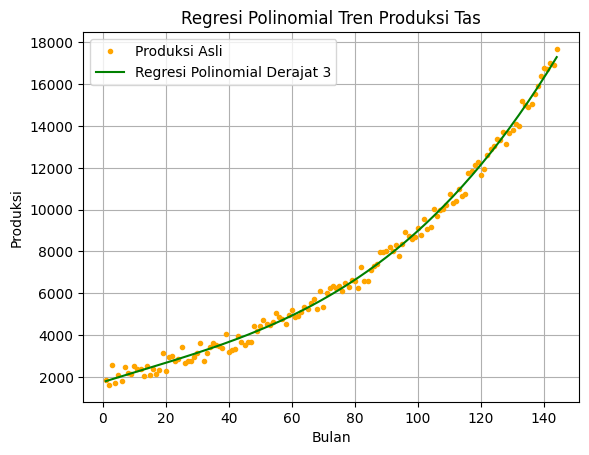

Regresi Polinomial - MAE: 245.304, RMSE: 288.436


In [3]:
# Data produksi tas per bulan
data_produksi = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162,
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
    16388, 16782, 16716, 17033, 16896, 17689
]

# Bulan dari 1 sampai 144
bulan = np.arange(1, len(data_produksi) + 1)

# Produksi tas
produksi = np.array(data_produksi)

# Fungsi untuk membentuk fitur polinomial
def create_polynomial_features(x, degree):
    return np.column_stack([x**i for i in range(degree + 1)])

# Derajat polinomial yang diinginkan
degree = 3

# Membentuk fitur polinomial
X_poly = create_polynomial_features(bulan, degree)

# Menghitung koefisien regresi menggunakan metode Least Squares
coefficients = np.linalg.lstsq(X_poly, produksi, rcond=None)[0]

# Membuat prediksi
produksi_pred = X_poly @ coefficients

# Plot data asli dan hasil regresi polinomial
plt.plot(bulan, produksi, marker='.', linestyle='', color='orange', label='Produksi Asli')
plt.plot(bulan, produksi_pred, color='green', linestyle='-', label=f'Regresi Polinomial Derajat {degree}')
plt.xlabel('Bulan')
plt.ylabel('Produksi')
plt.title('Regresi Polinomial Tren Produksi Tas')
plt.legend()
plt.grid(True)
plt.show()

# Hitung error
mae_poly = np.mean(np.abs(produksi - produksi_pred))
rmse_poly = np.sqrt(np.mean((produksi - produksi_pred)**2))

print(f'Regresi Polinomial - MAE: {mae_poly:.3f}, RMSE: {rmse_poly:.3f}')


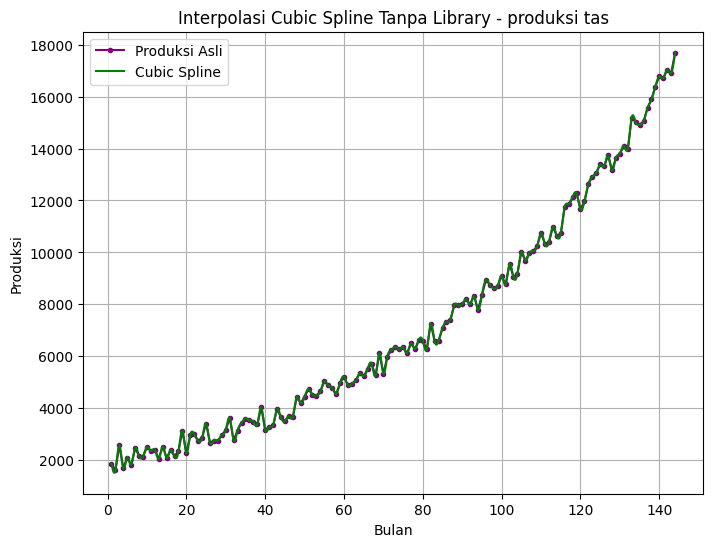

Cubic Spline Interpolation - MAE: 0.000, RMSE: 0.000


In [4]:
# Bulan dari 1 sampai 144
bulan = np.arange(1, len(data_produksi) + 1)

# Produksi
produksi = np.array(data_produksi)

# Hitung jumlah interval = panjang data produksi - 1
n = len(bulan) - 1

# Hitung ukuran langkah (perbedaan antar bulan)
h = bulan[1:] - bulan[:-1]

# Bangun sistem persamaan
A = np.zeros((n + 1, n + 1))
b = np.zeros(n + 1)

# Kondisi batas: spline alami (turunan kedua pada ujung interval adalah nol)
A[0, 0] = 1
A[n, n] = 1

# Titik-titik internal
for i in range(1, n):
    A[i, i - 1] = h[i - 1]
    A[i, i] = 2 * (h[i - 1] + h[i])
    A[i, i + 1] = h[i]
    b[i] = 3 * ((produksi[i + 1] - produksi[i]) / h[i] - (produksi[i] - produksi[i - 1]) / h[i - 1])

# Selesaikan untuk koefisien
c = np.linalg.solve(A, b)

# Hitung koefisien a, b, dan d
a = produksi[:-1]
b = (produksi[1:] - produksi[:-1]) / h - h * (2 * c[:-1] + c[1:]) / 3
d = (c[1:] - c[:-1]) / (3 * h)

# Fungsi untuk menghitung nilai spline cubic
def cubic_spline(x, i):
    return a[i] + b[i] * (x - bulan[i]) + c[i] * (x - bulan[i])**2 + d[i] * (x - bulan[i])**3

plt.figure(figsize=(8,6))
# Plot data asli dan hasil interpolasi spline kubik
plt.plot(bulan, produksi, marker='.', color='purple', label='Produksi Asli')

# Generate titik interpolasi spline kubik
for i in range(n):
    x = np.linspace(bulan[i], bulan[i + 1], 100)
    spline = cubic_spline(x, i)
    plt.plot(x, spline, color='green', label='Cubic Spline' if i == 0 else "")

plt.xlabel('Bulan')
plt.ylabel('Produksi')
plt.title('Interpolasi Cubic Spline Tanpa Library - produksi tas')
plt.legend()
plt.grid(True)
plt.show()

# Menghitung nilai interpolasi pada bulan asli
production_cs = [cubic_spline(bulan[i], i) for i in range(n)]
production_cs.append(cubic_spline(bulan[-1], n-1))

production_cs = np.array(production_cs)

# Menghitung kesalahan
error_cs = np.abs(production_cs - produksi)
mae_cs = np.mean(error_cs)
rmse_cs = np.sqrt(np.mean(error_cs ** 2))

# Cetak kesalahan dengan presisi 10^-3
print(f'Cubic Spline Interpolation - MAE: {mae_cs:.3f}, RMSE: {rmse_cs:.3f}')

MAE dan RMSE bernilai 0.000 yang artinya model cubic spline interpolasi sangat sesuai dengan data asli

- **cubic spline interpolation** adalah metode yang memastikan kurva interpolasi melewati semua titik data yang diberikan. sehingga prediksi pada titik-titik data asli akan persis sama dengan nilai aslinya, menghasilkan kesalahan nol. Ada kemungkinan overfitting, sehingga model terlalu cocok dengan data training dan ada kemungkinan tidak generalisasi dengan baik pada data baru.

sedangkan  
- **regresi polinomial DERAJAT 3** :

**MAE: 245.304, RMSE: 288.436** menunjukkan model polinomial derajat 5 memberikan prediksi cukup baik, tetapi masih ada kesalahan yang signifikan antara prediksi dan data aktual.

1.   Nilai ini menunjukkan bahwa, secara rata-rata, prediksi model polinomial
     memiliki selisih sekitar 245.304 unit produksi tas dari nilai sebenarnya.
2.   prediksi model polinomial memiliki rata-rata selisih sekitar 288.436 unit
     produksi tas dari nilai sebenarnya

2. *Karena Anda perlu memproses data menggunakan program komputer, Anda perlu mengubah model matematika dari soal #1 ke bentuk numeriknya (perkiraan). Hal ini dilakukan agar model matematika dapat dihitung oleh program dengan mudah. Karena akurasi tetap penting, pastikan konversi Anda seakurat mungkin. Berikan penjelasan kepada supervisor Anda tentang keakuratan konversi Anda.*





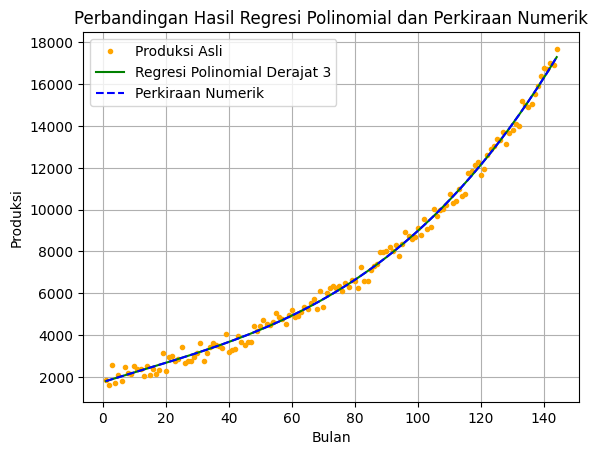

Regresi Polinomial - MAE: 245.304, RMSE: 288.436
Koefisien regresi polinomial derajat 3:
c_0: 1748.507
c_1: 47.224
c_2: -0.134
c_3: 0.004

**PERKIRAAN(NUMERIK)**

Rumus perkiraan numerik:
P(x) = 1748.507 + 47.224x + -0.134x^2 + 0.004x^3
Perkiraan Numerik - MAE: 245.304, RMSE: 288.436

 **PERBANDINGAN ERROR PERKIRAAN NUMERIK TERHADAP REGRESI POLINOMIAL**
MAE: 0.000, RMSE: 0.000


In [5]:
# REGRESI POLINOMIAL DERAJAT 3

# Data produksi tas per bulan
data_produksi = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162,
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
    16388, 16782, 16716, 17033, 16896, 17689
]

# Bulan dari 1 sampai 144
bulan = np.arange(1, len(data_produksi) + 1)

# Produksi tas
produksi = np.array(data_produksi)

# Fungsi untuk membentuk fitur polinomial
def create_polynomial_features(x, degree):
    return np.column_stack([x**i for i in range(degree + 1)])

# Derajat polinomial yang diinginkan
degree = 3

# Membentuk fitur polinomial
X_poly = create_polynomial_features(bulan, degree)

# Menghitung koefisien regresi menggunakan metode Least Squares
coefficients = np.linalg.lstsq(X_poly, produksi, rcond=None)[0]

# Membuat prediksi
produksi_pred = X_poly @ coefficients

# Hitung error
mae_poly = np.mean(np.abs(produksi - produksi_pred))
rmse_poly = np.sqrt(np.mean((produksi - produksi_pred)**2))

# Menghitung perkiraan numerik menggunakan rumus yang diberikan
produksi_pred_numerik = (
    coefficients[0] +
    coefficients[1] * bulan +
    coefficients[2] * bulan**2 +
    coefficients[3] * bulan**3
)

# Plot data asli, hasil regresi polinomial, dan perkiraan numerik
plt.plot(bulan, produksi, marker='.', linestyle='', color='orange', label='Produksi Asli')
plt.plot(bulan, produksi_pred, color='green', linestyle='-', label=f'Regresi Polinomial Derajat {degree}')
plt.plot(bulan, produksi_pred_numerik, color='blue', linestyle='--', label='Perkiraan Numerik')
plt.xlabel('Bulan')
plt.ylabel('Produksi')
plt.title('Perbandingan Hasil Regresi Polinomial dan Perkiraan Numerik')
plt.legend()
plt.grid(True)
plt.show()

print(f'Regresi Polinomial - MAE: {mae_poly:.3f}, RMSE: {rmse_poly:.3f}')

# Cetak koefisien polinomial
print(f'Koefisien regresi polinomial derajat {degree}:')
for i, coeff in enumerate(coefficients):
    print(f'c_{i}: {coeff:.3f}')

# Cetak rumus perkiraan numerik
rumus_numerik = f'P(x) = {coefficients[0]:.3f} + {coefficients[1]:.3f}x + {coefficients[2]:.3f}x^2 + {coefficients[3]:.3f}x^3'
print()
print('**PERKIRAAN(NUMERIK)**\n')
print(f'Rumus perkiraan numerik:\n{rumus_numerik}')


# Hitung error untuk perkiraan numerik
mae_numerik = np.mean(np.abs(produksi - produksi_pred_numerik))
rmse_numerik = np.sqrt(np.mean((produksi - produksi_pred_numerik)**2))

print(f'Perkiraan Numerik - MAE: {mae_numerik:.3f}, RMSE: {rmse_numerik:.3f}')

# Hitung selisih antara prediksi numerik dan hasil regresi polinomial
error_numerik_vs_polinomial = produksi_pred_numerik - produksi_pred

# Hitung MAE dan RMSE dari selisih
mae_error_numerik_vs_polinomial = np.mean(np.abs(error_numerik_vs_polinomial))
rmse_error_numerik_vs_polinomial = np.sqrt(np.mean(error_numerik_vs_polinomial**2))

# Cetak error
print('\n **PERBANDINGAN ERROR PERKIRAAN NUMERIK TERHADAP REGRESI POLINOMIAL**')
print(f'MAE: {mae_error_numerik_vs_polinomial:.3f}, RMSE: {rmse_error_numerik_vs_polinomial:.3f}')


model regresi polinomial dan rumus numerik memberikan perkiraan yang serupa dengan data asli. (nilai MAE dan RMSE sama)

Sehingga secara keseluruhan keduanya memiliki keakuratan yang setara dalam memodelkan data produksi tas per bulan.

In [6]:
# Membandingkan hasil perkiraan REGRESI POLINOMIAL dengan produksi asli
for month, estimated_production, actual_production in zip(bulan, produksi_pred, produksi):
    error = abs(estimated_production - actual_production)
    print(f"Bulan ke-{month}: Perkiraan: {estimated_production:.3f}, Produksi Asli: {actual_production}, Error: {error:.3f}")


Bulan ke-1: Perkiraan: 1795.600, Produksi Asli: 1863, Error: 67.400
Bulan ke-2: Perkiraan: 1842.447, Produksi Asli: 1614, Error: 228.447
Bulan ke-3: Perkiraan: 1889.072, Produksi Asli: 2570, Error: 680.928
Bulan ke-4: Perkiraan: 1935.498, Produksi Asli: 1685, Error: 250.498
Bulan ke-5: Perkiraan: 1981.748, Produksi Asli: 2101, Error: 119.252
Bulan ke-6: Perkiraan: 2027.846, Produksi Asli: 1811, Error: 216.846
Bulan ke-7: Perkiraan: 2073.813, Produksi Asli: 2457, Error: 383.187
Bulan ke-8: Perkiraan: 2119.674, Produksi Asli: 2171, Error: 51.326
Bulan ke-9: Perkiraan: 2165.452, Produksi Asli: 2134, Error: 31.452
Bulan ke-10: Perkiraan: 2211.170, Produksi Asli: 2502, Error: 290.830
Bulan ke-11: Perkiraan: 2256.851, Produksi Asli: 2358, Error: 101.149
Bulan ke-12: Perkiraan: 2302.518, Produksi Asli: 2399, Error: 96.482
Bulan ke-13: Perkiraan: 2348.194, Produksi Asli: 2048, Error: 300.194
Bulan ke-14: Perkiraan: 2393.903, Produksi Asli: 2523, Error: 129.097
Bulan ke-15: Perkiraan: 2439.668,

CUBIC SPLINE

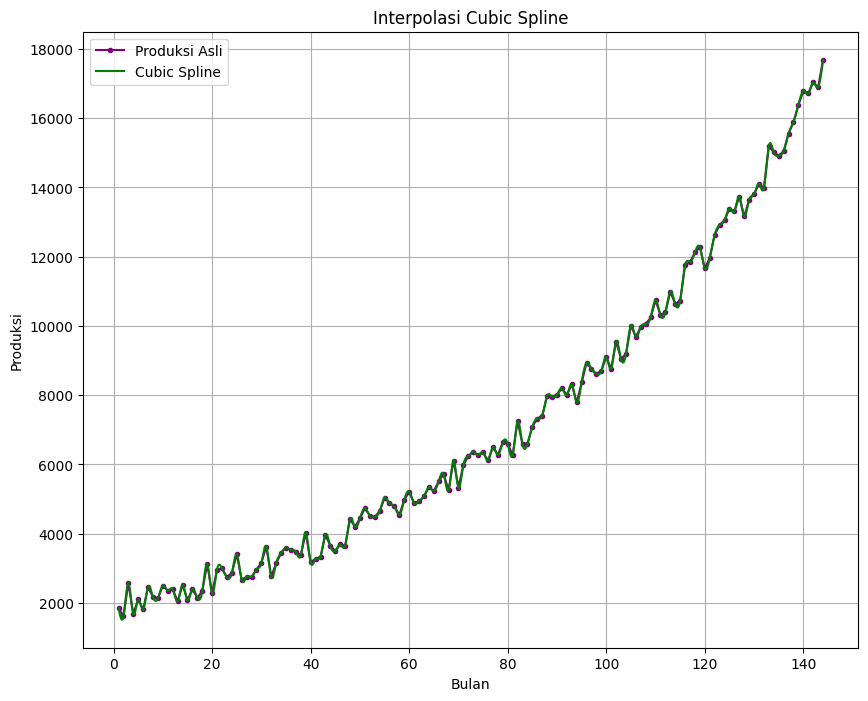

Cubic Spline Interpolation - MAE: 0.000, RMSE: 0.000

Bentuk numerik cubic spline tiap segmen:
S_i(x) = a_i + b_i * (x - x_i) + c_i * (x - x_i)^2 + d_i * (x - x_i)^3

** Segmen 1 **
Bulan 1 sampai 2
Fungsi kubik: S(x) = 1863.000 + -734.372(x - 1) + 0.000(x - 1)^2 + 485.372(x - 1)^3

** Segmen 2 **
Bulan 2 sampai 3
Fungsi kubik: S(x) = 1614.000 + 721.743(x - 2) + 1456.115(x - 2)^2 + -1221.859(x - 2)^3

** Segmen 3 **
Bulan 3 sampai 4
Fungsi kubik: S(x) = 2570.000 + -31.602(x - 3) + -2209.461(x - 3)^2 + 1356.063(x - 3)^3

** Segmen 4 **
Bulan 4 sampai 5
Fungsi kubik: S(x) = 1685.000 + -382.335(x - 4) + 1858.727(x - 4)^2 + -1060.392(x - 4)^3

** Segmen 5 **
Bulan 5 sampai 6
Fungsi kubik: S(x) = 2101.000 + 153.943(x - 5) + -1322.449(x - 5)^2 + 878.506(x - 5)^3

** Segmen 6 **
Bulan 6 sampai 7
Fungsi kubik: S(x) = 1811.000 + 144.562(x - 6) + 1313.068(x - 6)^2 + -811.630(x - 6)^3

** Segmen 7 **
Bulan 7 sampai 8
Fungsi kubik: S(x) = 2457.000 + 335.808(x - 7) + -1121.822(x - 7)^2 + 500.015(x 

In [7]:
# Data produksi
data_produksi = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162,
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
    16388, 16782, 16716, 17033, 16896, 17689
]
# Bulan dari 1 sampai 144
bulan = np.arange(1, len(data_produksi) + 1)

# Produksi
produksi = np.array(data_produksi)

# # TAHAPAN MENGUBAH KE BENTUK NUMERIK (PERKIRAAN)

# # 1. Menghitung ukuran langkah, bangun sistem persamaan
# Hitung jumlah interval = panjang data produksi - 1
n = len(bulan) - 1

# Hitung ukuran langkah (perbedaan antar bulan)
h = bulan[1:] - bulan[:-1]

# Bangun sistem persamaan
A = np.zeros((n + 1, n + 1))
b = np.zeros(n + 1)

# # Kondisi batas: spline alami (turunan kedua pada ujung interval adalah nol)
A[0, 0] = 1
A[n, n] = 1

# Titik-titik internal
for i in range(1, n):
    A[i, i - 1] = h[i - 1]
    A[i, i] = 2 * (h[i - 1] + h[i])
    A[i, i + 1] = h[i]
    b[i] = 3 * ((produksi[i + 1] - produksi[i]) / h[i] - (produksi[i] - produksi[i - 1]) / h[i - 1])

# # 2. Selesaikan sistem persamaan ->
# menyelesaikan sistem persamaan linier 𝐴 ⋅ c = b
# untuk menemukan koefisien spline c (memberikan nilai dari turunan kedua spline pada setiap titik data).
c = np.linalg.solve(A, b)

# 3. Hitung koefisien a, b, dan d
a = produksi[:-1]
b = (produksi[1:] - produksi[:-1]) / h - h * (2 * c[:-1] + c[1:]) / 3
d = (c[1:] - c[:-1]) / (3 * h)

# 4. Fungsi untuk menghitung nilai cubic spline
def cubic_spline(x, i):
    return a[i] + b[i] * (x - bulan[i]) + c[i] * (x - bulan[i])**2 + d[i] * (x - bulan[i])**3

plt.figure(figsize=(10,8))
# Plot data asli dan hasil interpolasi spline kubik
plt.plot(bulan, produksi, marker='.', color='purple', label='Produksi Asli')

# Generate titik interpolasi spline kubik
for i in range(n):
    x = np.linspace(bulan[i], bulan[i + 1], 100)
    spline = cubic_spline(x, i)
    plt.plot(x, spline, color='green', label='Cubic Spline' if i == 0 else "")

plt.xlabel('Bulan')
plt.ylabel('Produksi')
plt.title('Interpolasi Cubic Spline')
plt.legend()
plt.grid(True)
plt.show()

# Menghitung kesalahan

# Mengambil nilai interpolasi pada bulan asli
production_cs = [cubic_spline(bulan[i], i) for i in range(n)]
production_cs.append(cubic_spline(bulan[-1], n-1))

production_cs = np.array(production_cs)

# Hitung eror
# Mean Absolute Error
mae_cs = mean_absolute_error(produksi, production_cs)

# Root Mean Squared Error
rmse_cs = np.sqrt(mean_squared_error(produksi, production_cs))

# Cetak eror dengan presisi 10^-3
print(f'Cubic Spline Interpolation - MAE: {mae_cs:.3f}, RMSE: {rmse_cs:.3f}\n')

# Menampilkan rumus general cubic spline
print("Bentuk numerik cubic spline tiap segmen:")
print("S_i(x) = a_i + b_i * (x - x_i) + c_i * (x - x_i)^2 + d_i * (x - x_i)^3\n")

# Menampilkan fungsi cubic spline untuk setiap segmen
for i in range(n):
    print(f'** Segmen {i + 1} **')
    print(f'Bulan {bulan[i]} sampai {bulan[i + 1]}')
    print(f'Fungsi kubik: S(x) = {a[i]:.3f} + {b[i]:.3f}(x - {bulan[i]}) + {c[i]:.3f}(x - {bulan[i]})^2 + {d[i]:.3f}(x - {bulan[i]})^3\n')


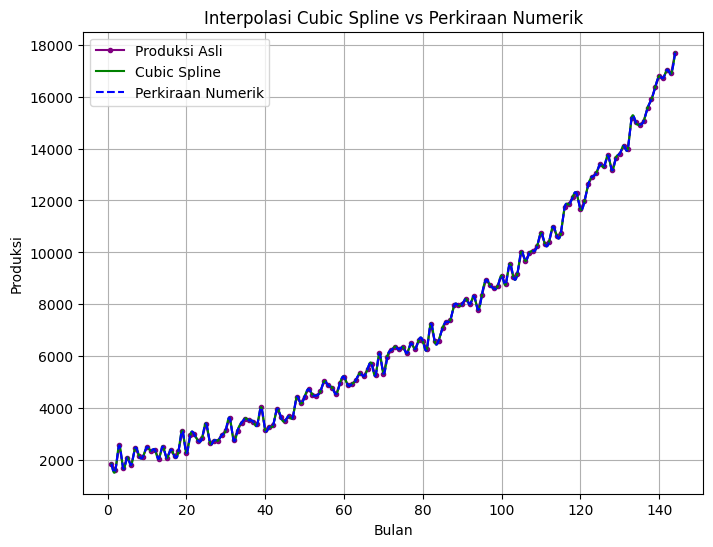

Cubic Spline Interpolation - MAE: 0.000, RMSE: 0.000
Perkiraan Numerik - MAE: 0.139, RMSE: 0.373


In [8]:
# Fungsi perkiraan numerik berdasarkan cubic spline
def produksi_pred_numerik(x):
    produksi_numerik = np.zeros_like(x)
    for j, xi in enumerate(x):
        for i in range(n):
            if bulan[i] <= xi <= bulan[i + 1]:
                produksi_numerik[j] = cubic_spline(xi, i)
                break
    return produksi_numerik

# Plot data asli, hasil interpolasi spline kubik, dan perkiraan numerik
plt.figure(figsize=(8,6))
plt.plot(bulan, produksi, marker='.', color='purple', label='Produksi Asli')

# Plot hasil interpolasi spline kubik
for i in range(n):
    x = np.linspace(bulan[i], bulan[i + 1], 100)
    spline = cubic_spline(x, i)
    plt.plot(x, spline, color='green', label='Cubic Spline' if i == 0 else "")

# Plot perkiraan numerik
x_vals = np.linspace(bulan.min(), bulan.max(), 1000)
plt.plot(x_vals, produksi_pred_numerik(x_vals), color='blue', linestyle='--', label='Perkiraan Numerik')

plt.xlabel('Bulan')
plt.ylabel('Produksi')
plt.title('Interpolasi Cubic Spline vs Perkiraan Numerik')
plt.legend()
plt.grid(True)
plt.show()

# Menghitung kesalahan

# Mengambil nilai interpolasi pada bulan asli
production_cs = np.array([cubic_spline(bulan[i], i) for i in range(n)] + [cubic_spline(bulan[-1], n-1)])

# Menghitung perkiraan numerik pada bulan asli
production_numerik = produksi_pred_numerik(bulan)

# Hitung error
# Mean Absolute Error
mae_cs = mean_absolute_error(produksi, production_cs)
mae_numerik = mean_absolute_error(produksi, production_numerik)

# Root Mean Squared Error
rmse_cs = np.sqrt(mean_squared_error(produksi, production_cs))
rmse_numerik = np.sqrt(mean_squared_error(produksi, production_numerik))

# Cetak error dengan presisi 10^-3
print(f'Cubic Spline Interpolation - MAE: {mae_cs:.3f}, RMSE: {rmse_cs:.3f}')
print(f'Perkiraan Numerik - MAE: {mae_numerik:.3f}, RMSE: {rmse_numerik:.3f}')


 penyelesaian cubic spline mengubah model matematika ke bentuk numerik (perkiraan) memberikan interpolasi yang akurat dan kontinu, sesuai untuk data yang kompleks dan tidak linier(karena membutuhkan akurasi yang lebih tinggi), tetapi ada kemungkinan overfitting karena niai error benar-benar 0. Regresi polinomial memiliki nilai error(MAE dan RMSE) yang lebih tinggi (akurasi lebih rendah) tetapi tidak overfitting.


*3*. *Gudang didesain mampu menyimpan maksimal 25.000 (dua puluh lima ribu) karung setiap bulannya. Supervisor Anda meminta Anda memberikan prediksi kapan EGIER perlu membangun gudang baru berdasarkan tren yang Anda peroleh pada soal #2. Untuk membangun gudang baru diperkirakan membutuhkan waktu setidaknya 13 bulan. Jadi sediakan waktu ketika EIGER perlu mulai membangun gudang barunya. (Petunjuk: ini dapat didekati sebagai akar permasalahan persamaan)*


Bulan yang diprediksi akan melebihi kapasitas gudang (Cubic Spline): 145.470
Bulan untuk memulai membangun gudang baru (Cubic Spline): 132.470


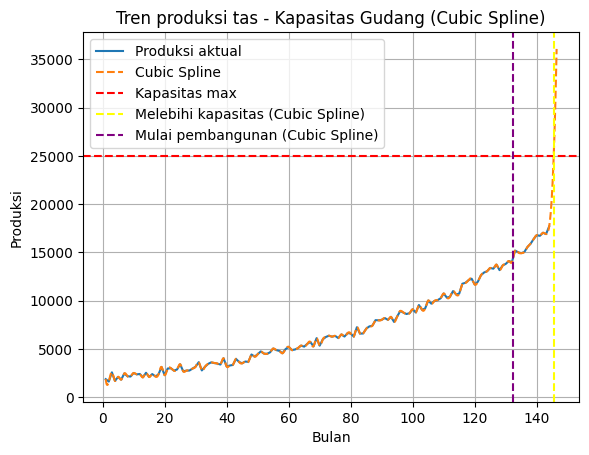



Bulan yang diprediksi akan melebihi kapasitas gudang (Regresi Polinomial): 170.380
Bulan untuk memulai membangun gudang baru (Regresi Polinomial): 157.380


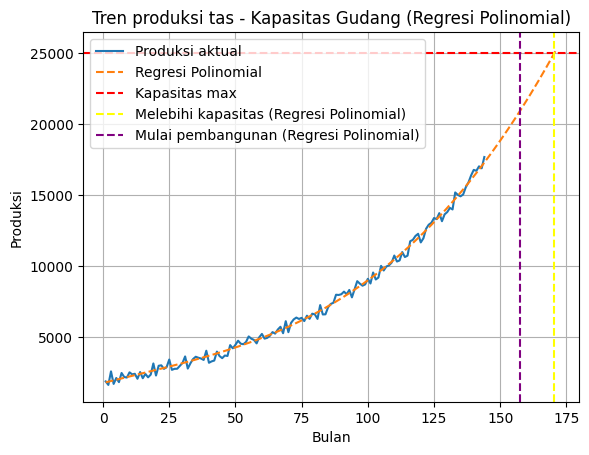

In [9]:
# Fungsi untuk memperbarui interpolasi cubic spline
def update_cubic_spline(months, production):
    return CubicSpline(months, production)

# Fungsi untuk melakukan prediksi melebihi kapasitas gudang
def predict_month_to_build_gudang(cs, max_karung, step=0.01):
    exceed_capacity_point = None
    for month in np.arange(1, 300, step):
        if cs(month) > max_karung:
            exceed_capacity_point = month
            break
    return exceed_capacity_point

# Maksimal karung setiap bulannya = 25.000 karung
max_karung = 25000

# Buat interpolasi cubic spline
cs = update_cubic_spline(bulan, produksi)

# Temukan bulan untuk memulai membangun gudang baru dengan resolusi tinggi
exceed_capacity_point = predict_month_to_build_gudang(cs, max_karung, step=0.0001)
if exceed_capacity_point:
    month_to_start_building = exceed_capacity_point - 13
    print(f"Bulan yang diprediksi akan melebihi kapasitas gudang (Cubic Spline): {exceed_capacity_point:.3f}")
    print(f"Bulan untuk memulai membangun gudang baru (Cubic Spline): {month_to_start_building:.3f}")

    # Plot hasil
    plt.plot(bulan, produksi, label='Produksi aktual')
    future_months = np.arange(1, exceed_capacity_point + 1, 0.1)
    plt.plot(future_months, cs(future_months), label='Cubic Spline', linestyle='--')
    plt.axhline(y=max_karung, color='r', linestyle='--', label='Kapasitas max')
    plt.axvline(x=exceed_capacity_point, color='yellow', linestyle='--', label='Melebihi kapasitas (Cubic Spline)')
    plt.axvline(x=month_to_start_building, color='purple', linestyle='--', label='Mulai pembangunan (Cubic Spline)')
    plt.xlabel('Bulan')
    plt.ylabel('Produksi')
    plt.title('Tren produksi tas - Kapasitas Gudang (Cubic Spline)')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Tidak ada prediksi melebihi kapasitas gudang dalam rentang waktu yang diberikan (Cubic Spline).")

print()
print()

# Fungsi untuk melakukan regresi polinomial manual
def polynomial_regression_manual(X, y, degree):
    X_poly = np.vstack([X**i for i in range(degree + 1)]).T
    coef = np.linalg.lstsq(X_poly, y, rcond=None)[0]
    return coef

# Fungsi untuk melakukan prediksi menggunakan model regresi polinomial manual
def predict_production_polynomial_manual(coef, month):
    return sum(c * month**i for i, c in enumerate(coef))

# Derajat polinomial
degree = 3

# Hitung koefisien untuk regresi polinomial manual
coef_poly = polynomial_regression_manual(bulan, produksi, degree)

# Temukan bulan untuk memulai membangun gudang baru menggunakan regresi polinomial manual
def predict_month_to_build_gudang_polynomial_manual(max_karung, coef, max_month=300):
    exceed_capacity_point = None
    for month in np.arange(1, max_month, 0.01):
        if predict_production_polynomial_manual(coef, month) > max_karung:
            exceed_capacity_point = month
            break
    return exceed_capacity_point

exceed_capacity_point_poly_manual = predict_month_to_build_gudang_polynomial_manual(max_karung, coef_poly)
if exceed_capacity_point_poly_manual:
    month_to_start_building_poly_manual = exceed_capacity_point_poly_manual - 13
    print(f"Bulan yang diprediksi akan melebihi kapasitas gudang (Regresi Polinomial): {exceed_capacity_point_poly_manual:.3f}")
    print(f"Bulan untuk memulai membangun gudang baru (Regresi Polinomial): {month_to_start_building_poly_manual:.3f}")

    # Plot hasil
    future_months = np.arange(1, exceed_capacity_point_poly_manual + 1, 0.1)
    predicted_production_poly_manual = [predict_production_polynomial_manual(coef_poly, month) for month in future_months]

    plt.plot(bulan, produksi, label='Produksi aktual')
    plt.plot(future_months, predicted_production_poly_manual, label='Regresi Polinomial', linestyle='--')
    plt.axhline(y=max_karung, color='r', linestyle='--', label='Kapasitas max')
    plt.axvline(x=exceed_capacity_point_poly_manual, color='yellow', linestyle='--', label='Melebihi kapasitas (Regresi Polinomial)')
    plt.axvline(x=month_to_start_building_poly_manual, color='purple', linestyle='--', label='Mulai pembangunan (Regresi Polinomial)')
    plt.xlabel('Bulan')
    plt.ylabel('Produksi')
    plt.title('Tren produksi tas - Kapasitas Gudang (Regresi Polinomial)')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Tidak ada prediksi melebihi kapasitas gudang dalam rentang waktu yang diberikan (Regresi Polinomial).")


DIBANDINGKAN DGN NEWTON RAPHSON

In [10]:
# Fungsi untuk menentukan fungsi (ketika produksi melebihi kapasitas max) dengan regresi polinomial
def find_month_to_build_gudang(coefficients):
    def func(x):
        return sum(coefficients[i] * x**i for i in range(len(coefficients))) - max_karung
    return func

# Menentukan fungsi (ketika produksi melebihi kapasitas max) dengan regresi polinomial
find_month_to_build_gudang_poly = find_month_to_build_gudang(coefficients)

# Fungsi untuk mencari bulan saat produksi melebihi kapasitas gudang dengan regresi polinomial menggunakan metode Newton-Raphson
def find_month_to_build_gudang_newton_polynomial(coefficients):

    # Inisialisasi/tebakan awal (bulan) untuk iterasi
    x0 = 145
    epsilon = 0.01  # Toleransi perbedaan antar iterasi

    # Maksimum iterasi
    max_iter = 1000

    # Loop iterasi i selama tidak melebihi iterasi max
    for i in range(max_iter):
        fx0 = find_month_to_build_gudang_poly(x0)
        f_prime_x0 = sum(i * coefficients[i] * x0**(i - 1) for i in range(1, len(coefficients)))  # hitung turunan pertama regresi polinomial pd x0

        x1 = x0 - fx0 / f_prime_x0  # rumus iterasi newton-raphson

        if abs(x1 - x0) < epsilon: #periksa apakah lebih kecil dari toleransi
            return x1

        x0 = x1 #update nilai x0 untuk iterasi selanjutnya

    return None  # tidak berhasil memenuhi abs(x1-x0) < epsilon dalam batasan iterasi

# Menemukan bulan saat produksi akan melebihi kapasitas gudang untuk regresi polinomial
month_to_exceed_capacity_newton_poly = find_month_to_build_gudang_newton_polynomial(coefficients)

# Menghitung bulan untuk memulai membangun gudang baru untuk regresi polinomial
month_to_start_building_newton_poly = month_to_exceed_capacity_newton_poly - 13 if month_to_exceed_capacity_newton_poly is not None else None

print(f"Bulan yang diprediksi akan melebihi kapasitas gudang (Newton-Raphson - Regresi Polinomial Derajat 3): {month_to_exceed_capacity_newton_poly:.3f}")
print(f"Bulan untuk memulai membangun gudang baru (Newton-Raphson - Regresi Polinomial Derajat 3): {month_to_start_building_newton_poly:.3f}")


Bulan yang diprediksi akan melebihi kapasitas gudang (Newton-Raphson - Regresi Polinomial Derajat 3): 170.374
Bulan untuk memulai membangun gudang baru (Newton-Raphson - Regresi Polinomial Derajat 3): 157.374


Bulan yang diprediksi akan melebihi kapasitas gudang (Newton-Raphson): 145.470
Bulan untuk memulai membangun gudang baru (Newton-Raphson): 132.470


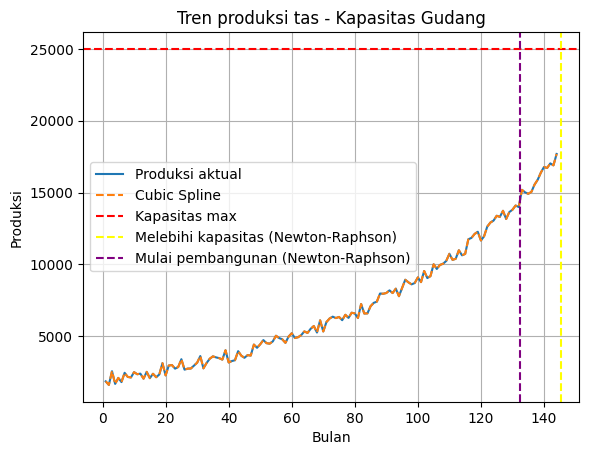

In [11]:
# NEWTON RAPHSON - cubic spline

# maksimal karung setiap bulannya = 25.000 karung
max_karung = 25000

def find_month_to_build_gudang(x):
    return cs(x) - max_karung

# Menentukan fungsi (ketika produksi melebihi kapasitas max)
def find_month_to_build_gudang_newton():

    # Inisialisasi/tebakan awal (bulan) untuk iterasi
    x0 = 145
    epsilon = 0.01  # Toleransi perbedaan antar iterasi

    # Maksimum iterasi
    max_iter = 1000

    # Loop iterasi i selama tidak melebihi iterasi max
    for i in range(max_iter):
        fx0 = find_month_to_build_gudang(x0)
        f_prime_x0 = cs(x0, 1)  # hitung turunan pertama cubic spline pd x0

        x1 = x0 - fx0 / f_prime_x0  # rumus iterasi newton-raphson

        if abs(x1 - x0) < epsilon: #periksa apakah lebih kecil dari toleransi
            return x1

        x0 = x1 #update nilai x0 untuk iterasi selanjutnya

    return None  # tidak berhasil memenuhi abs(x1-x0) < epsilon dalam batasan iterasi

# Menemukan bulan saat produksi akan melebihi kapasitas gudang
month_to_exceed_capacity_newton = find_month_to_build_gudang_newton()

# Menghitung bulan untuk mulai membangun gudang baru
month_to_start_building_newton = month_to_exceed_capacity_newton - 13 if month_to_exceed_capacity_newton is not None else None
# bangun gudang 13 bulan sblm produksi melebihi kapasitas

print(f"Bulan yang diprediksi akan melebihi kapasitas gudang (Newton-Raphson): {month_to_exceed_capacity_newton:.3f}")
print(f"Bulan untuk memulai membangun gudang baru (Newton-Raphson): {month_to_start_building_newton:.3f}")

plt.plot(bulan, produksi, label='Produksi aktual')
plt.plot(bulan, production_cs, label='Cubic Spline', linestyle='--')
plt.axhline(y=max_karung, color='r', linestyle='--', label='Kapasitas max')
if month_to_exceed_capacity_newton is not None:
    plt.axvline(x=month_to_exceed_capacity_newton, color='yellow', linestyle='--', label='Melebihi kapasitas (Newton-Raphson)')
if month_to_start_building_newton is not None:
    plt.axvline(x=month_to_start_building_newton, color='purple', linestyle='--', label='Mulai pembangunan (Newton-Raphson)')
plt.xlabel('Bulan')
plt.ylabel('Produksi')
plt.title('Tren produksi tas - Kapasitas Gudang')
plt.legend()
plt.grid()
plt.show()

\

*   Alasan menggunakkan metode **regresi polinomial derajat 3** :

dapat digunakan untuk membuat prediksi langsung berdasarkan tren data yang ada. (memperkirakan kapan produksi melebihi kapasitas gudang tanpa perlu melakukan iterasi atau mencari akar persamaan matematika seperti Newton-Raphson), tidak overfitting terhadap data.(kehilangan kemampuan umum mengeneralisasi pola)